In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [46]:
# Load the dataset
df = pd.read_csv('C:/Users/HP/OneDrive/Documents/AI & ML/Bike Sharing Data.csv')

# Display the shape of the DataFrame
print("Data Shape:", df.shape)

# Show the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display information about the DataFrame
print("\nData Info:")
print(df.info())

Data Shape: (730, 16)

First few rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2 

In [48]:
# Function to preprocess the data
def preprocess_data(dataframe):
    # Create a duplicate of the original DataFrame to avoid altering the original data
    df_processed = dataframe.copy()
    
    # Check for missing values in the DataFrame
    if df_processed.isnull().values.any():
        print("Warning: Missing values detected in the DataFrame.")
    
    # Map numerical values of season to categorical labels
    season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
    df_processed['season'] = df_processed['season'].map(season_mapping)
    
    # Map numerical values of weathersit to corresponding categorical labels
    weather_mapping = {
        1: 'clear',
        2: 'mist',
        3: 'light_precip',
        4: 'heavy_precip'
    }
    df_processed['weathersit'] = df_processed['weathersit'].map(weather_mapping)
    
    # Generate dummy variables for categorical columns, dropping the first category to avoid multicollinearity
    df_processed = pd.get_dummies(df_processed, columns=['season', 'weathersit'], drop_first=True)
    
    # Remove unnecessary columns from the DataFrame
    columns_to_remove = ['instant', 'dteday', 'casual', 'registered']
    df_processed.drop(columns=columns_to_remove, inplace=True)
    
    # Display the shape and columns of the processed DataFrame
    print(f"\nProcessed DataFrame shape: {df_processed.shape}")
    print(f"Processed DataFrame columns: {df_processed.columns.tolist()}")
    
    return df_processed

# Process the dataset using the defined function
df_processed = preprocess_data(df)

# Display the first few rows of the processed dataset
print("\nProcessed Dataset Head:")
print(df_processed.head())


Processed DataFrame shape: (730, 15)
Processed DataFrame columns: ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter', 'weathersit_light_precip', 'weathersit_mist']

Processed Dataset Head:
   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_spring  season_summer  season_winter  \
0  10.749882   985           True          False          False   
1  16.652113   801           True          False          False   
2  16.636703  1349           True          False          False 

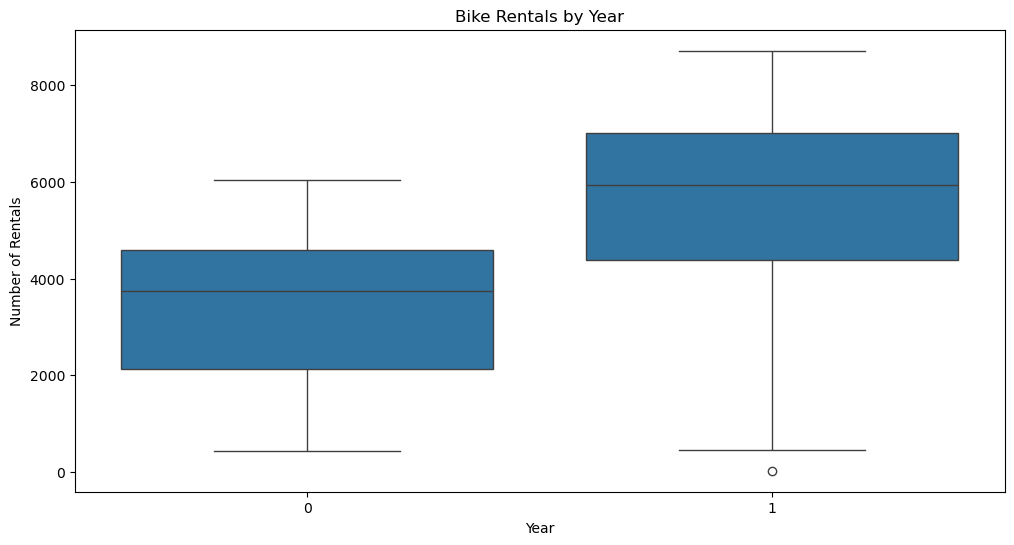

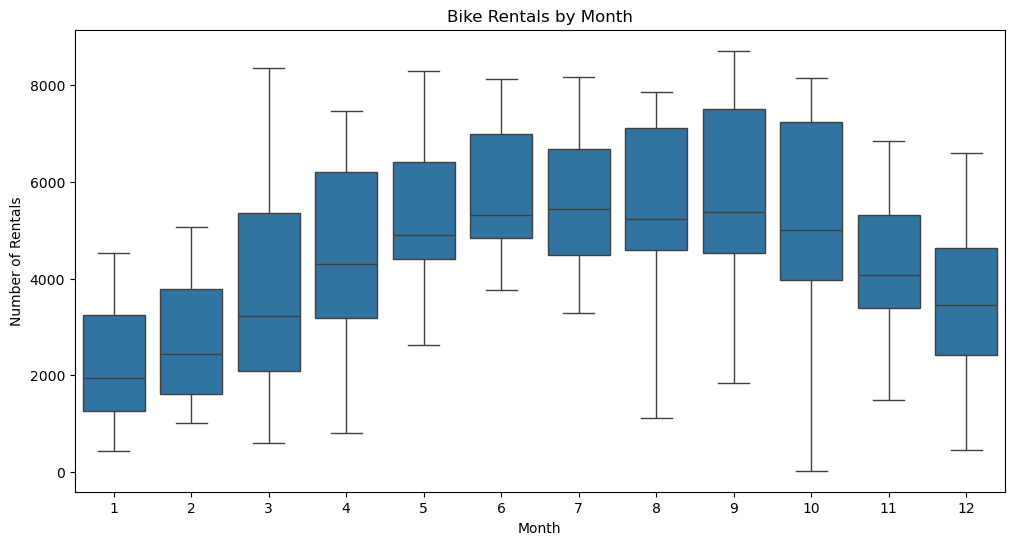

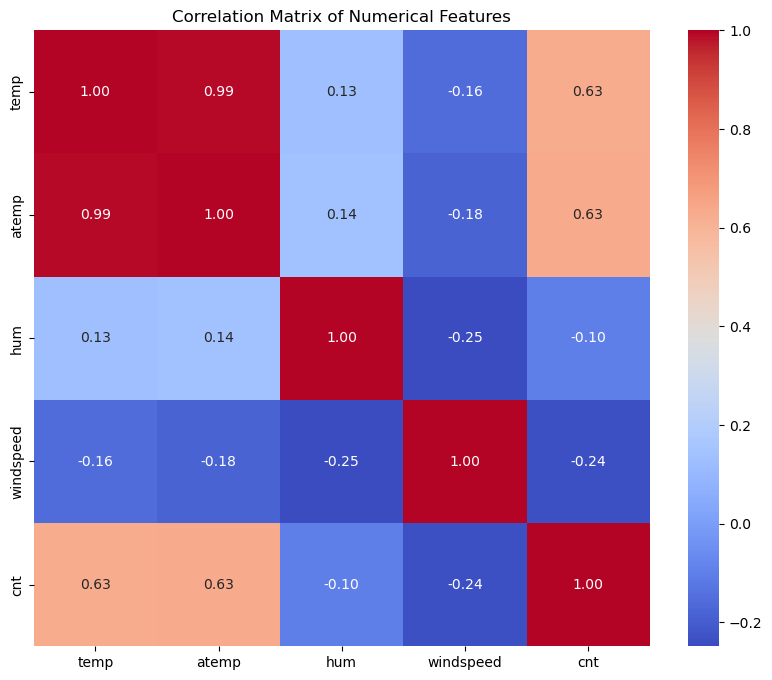

In [50]:
# Visualization: Boxplot for bike rentals by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='yr', y='cnt', data=df)  # Create a boxplot showing rentals by year
plt.title('Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rentals')
plt.show()

# Visualization: Boxplot for bike rentals by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=df)  # Create a boxplot showing rentals by month
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

# Perform correlation analysis on numerical variables
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = df[numerical_features].corr()  # Calculate correlation matrix

# Create a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [52]:
# Prepare feature matrix (X) and target variable (y)
X = df_processed.drop('cnt', axis=1)  # Features (excluding the target)
y = df_processed['cnt']  # Target variable (number of rentals)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()  # Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data

# Model Building: Create and train the Linear Regression model
model = LinearRegression()  # Initialize the linear regression model
model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data


LinearRegression()

In [54]:
# Generate predictions using the test dataset
predictions = model.predict(X_test_scaled)  # Predict on scaled test data

# Calculate R-squared score and other performance metrics
r_squared = r2_score(y_test, predictions)  # Calculate R-squared
mean_squared_error_value = mean_squared_error(y_test, predictions)  # Calculate Mean Squared Error
root_mean_squared_error = np.sqrt(mean_squared_error_value)  # Calculate Root Mean Squared Error

# Display the model performance metrics
print("\nModel Performance Metrics:")
print(f"R-squared Score: {r_squared:.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error:.2f}")


Model Performance Metrics:
R-squared Score: 0.8521
Root Mean Squared Error: 711.55


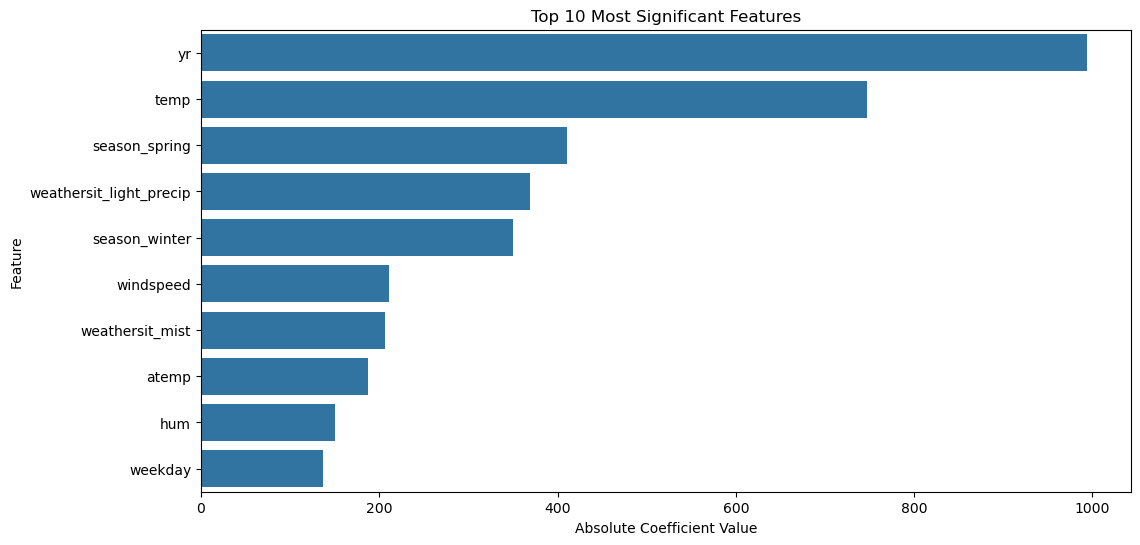

In [56]:
# Create a DataFrame to assess feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': model.coef_  # Model coefficients
})

# Calculate the absolute values of the coefficients for ranking
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()

# Sort the DataFrame by absolute coefficients in descending order
importance_df = importance_df.sort_values('Absolute_Coefficient', ascending=False)

# Create a bar plot for the top 10 most significant features
plt.figure(figsize=(12, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Significant Features')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


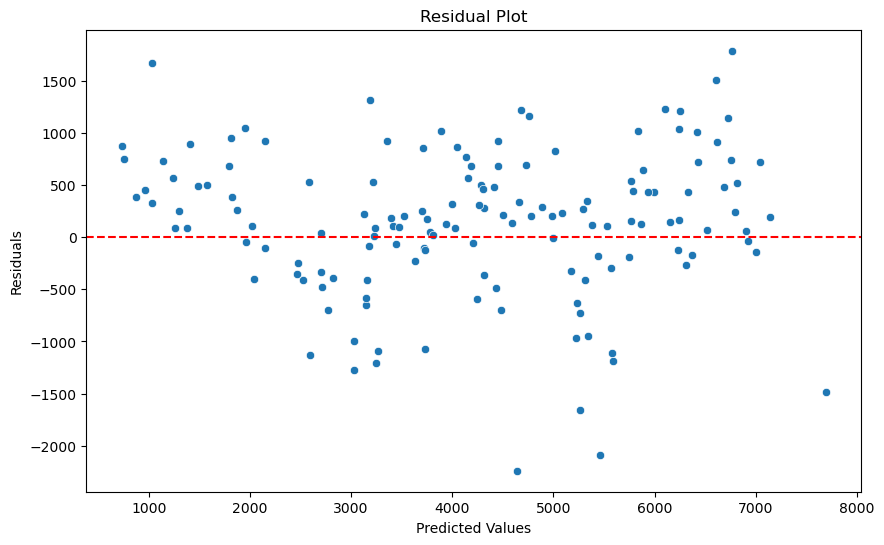

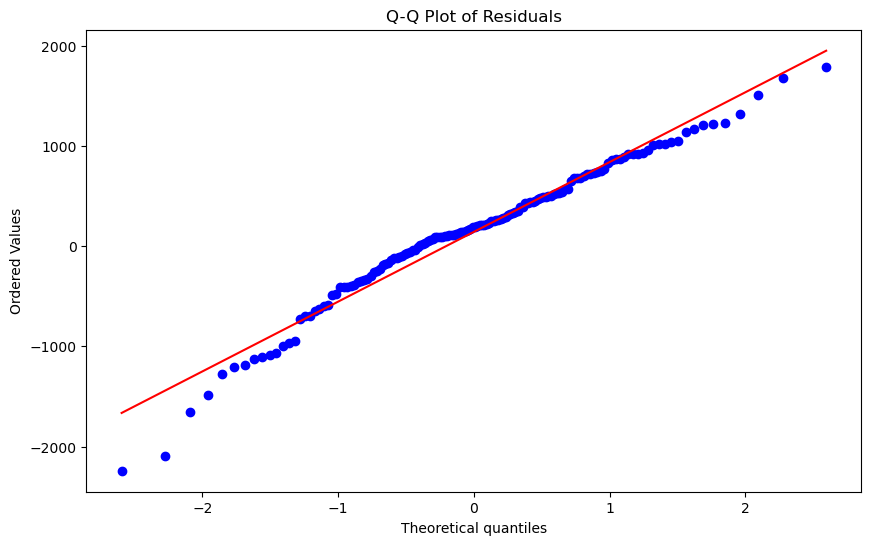

In [58]:
# Compute residuals to analyze prediction errors
residuals = y_test - predictions  # Calculate the difference between actual and predicted values

# Create a scatter plot to visualize residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)  # Scatter plot of predicted values vs. residuals
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot to examine the normality of residuals
from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)  # Generate Q-Q plot of residuals
plt.title('Q-Q Plot of Residuals')
plt.show()

In [60]:
# Display key findings from the model evaluation
print("\nKey Findings:")
print("1. Model Performance:")
print(f"   - R-squared Score: {r_squared:.4f}")  # R-squared score output
print(f"   - RMSE: {mean_squared_error_value:.2f}")  # RMSE output
print("\n2. Most Significant Features:")
print(importance_df[['Feature', 'Coefficient']].head(5).to_string(index=False))  # Top 5 features and their coefficients

# Provide insights based on model performance
print("\n3. Model Insights:")
print("   - The model accounts for {:.1f}% of the variance in bike rental demand.".format(r_squared * 100))  # Variance explanation
print("   - Temperature and season are among the most influential predictors.")  # Key predictors
print("   - Weather conditions have a significant impact on rental trends.")  # Impact of weather
print("   - A clear yearly trend indicates an increase in demand.")  # Demand trends


Key Findings:
1. Model Performance:
   - R-squared Score: 0.8521
   - RMSE: 506297.02

2. Most Significant Features:
                Feature  Coefficient
                     yr   993.478844
                   temp   747.433416
          season_spring  -411.164380
weathersit_light_precip  -369.016066
          season_winter   349.940937

3. Model Insights:
   - The model accounts for 85.2% of the variance in bike rental demand.
   - Temperature and season are among the most influential predictors.
   - Weather conditions have a significant impact on rental trends.
   - A clear yearly trend indicates an increase in demand.
